In [3]:
import requests

# Підключення з відкриттям сесії
headers = {
    "Accept": "*/*",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
}

def get_response(url):
    s = requests.Session()
    response = s.get(url=url, headers=headers)
    
    return response

In [4]:
import json

# читання та запис *.json файлу
def get_json(url):
    with open("result_page.json", "w", encoding="utf-8") as file:
        json.dump(get_response(url).json(), file, indent=4, ensure_ascii=False)

In [5]:
# отримання кількості сторінок та елементів відбору 
def get_collection(url):
    data = get_response(url).json()
    last_page = data.get("last_page")
    total_items = data.get("total_items")
    
    return last_page, total_items

В процесі взаємодії є кілька варіантів запитів: 
 - через меню підвалу (відбір іде по вибраній категорії, при цьому локація фіксована - "_Київ, Україна_")
 - через меню навігаціїї (відбір іде по вибраній категорії, при цьому локація визначаеться по геолокації
 користувача або та, яка раніше була вказана, а також за замовчуванням відбір тільки по салонам)
 - через блок пошуку (відбір іде по вибраній категорії, при цьому локація визначаеться по геолокації користувача 
 або та, яка раніше була вказана)
В результаті отримуємо дані в форматі **_*.json_**, але різні набори та адреси з відповідями. 

В прикладі використав відповідь, отриману через блок пошуку.  

https://mybeauty.ua/search?searchText=%D0%91%D0%B0%D1%80%D0%B1%D0%B5%D1%80%D1%88%D0%BE%D0%BF%D0%B8&latitude=50.4501&longitude=30.5234&address=%D0%9A%D0%B8%D1%97%D0%B2,%20Ukraine

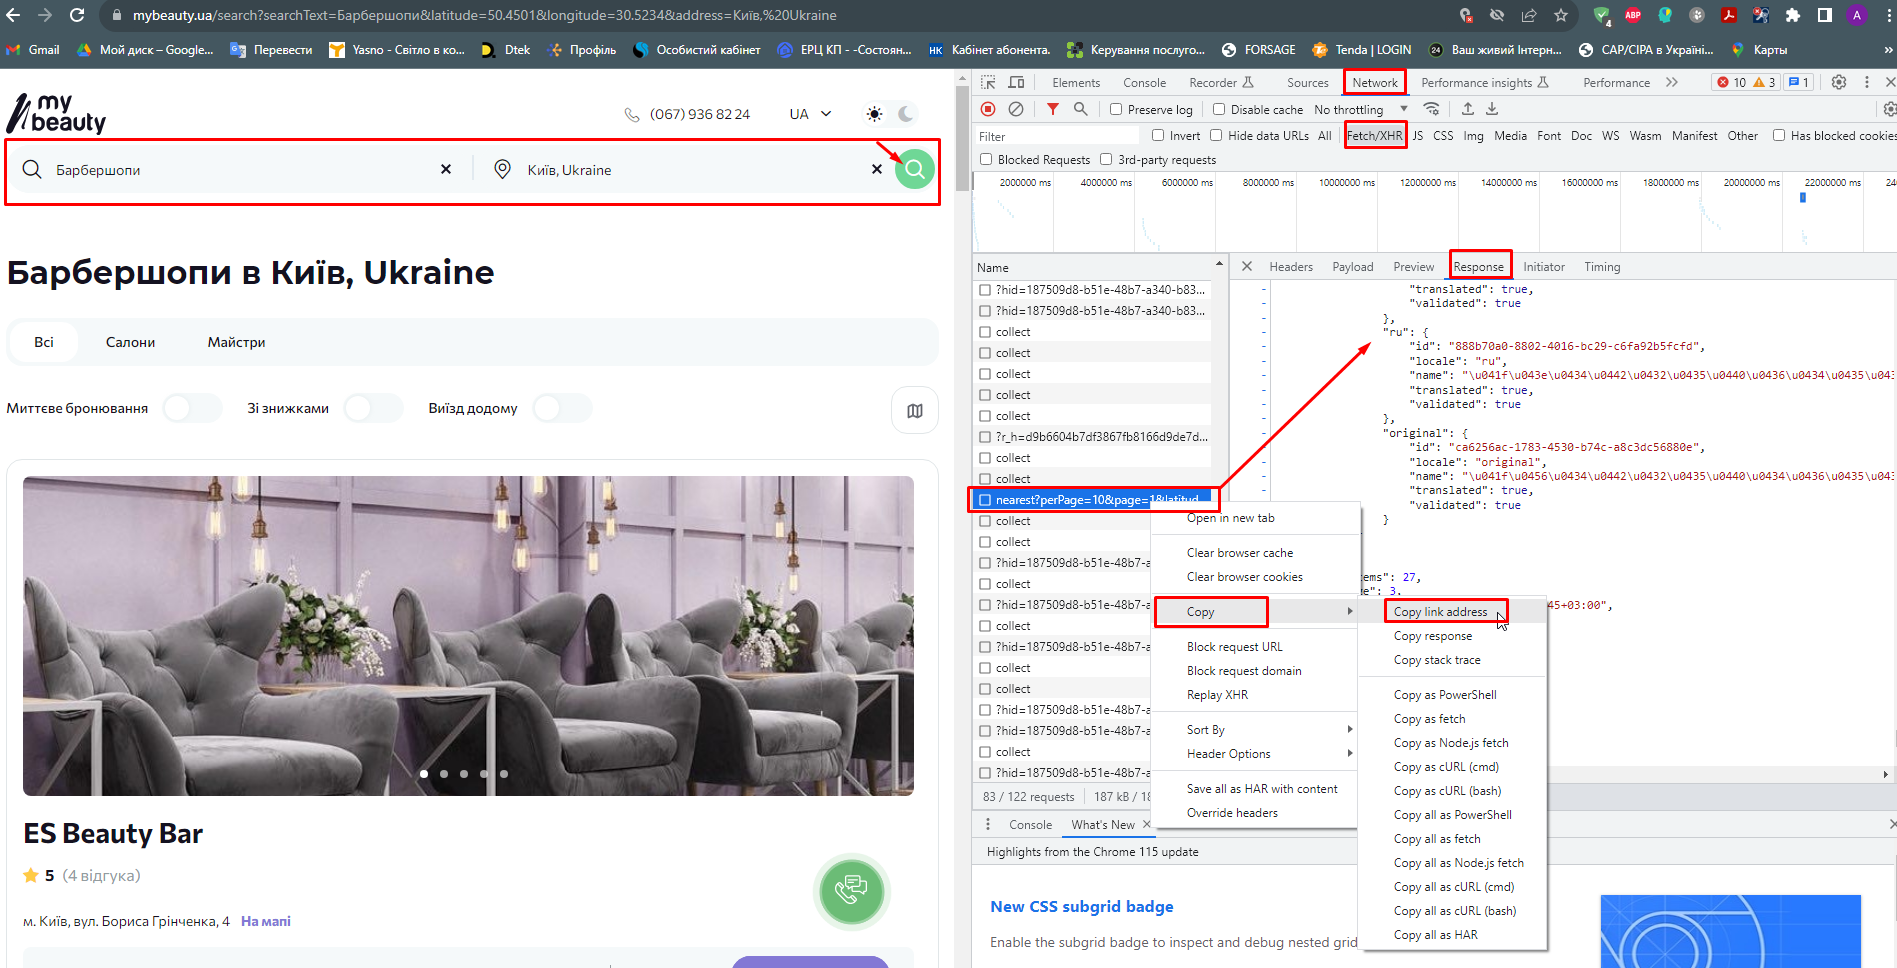

In [46]:
url = "https://app.mybeauty.ua/api/v1/salon/nearest?\
perPage=10\
&page=1\
&latitude=50.4501\
&longitude=30.5234\
&searchText=%D0%91%D0%B0%D1%80%D0%B1%D0%B5%D1%80%D1%88%D0%BE%D0%BF%D0%B8\
&address=%D0%9A%D0%B8%D1%97%D0%B2,%20Ukraine"

In [47]:
# Список з кількостю відібраних сторінок та елементів:
# - перший елемент - кількість сторінок
# - другий елемент - кількість відібраних елементів
pages = get_collection(url)

In [48]:
print(pages)

(3, 27)


In [51]:
# Перша сторінка відбору
page = 1

# в циклі проходимо по всім сторінкам відбору (Барбершопи в Києві)
for i in range(0, pages[0]):
    url_page = (f"https://app.mybeauty.ua/api/v1/salon/nearest?\
perPage=10\
&page={page+i}\
&latitude=50.4501\
&longitude=30.5234\
&searchText=%D0%91%D0%B0%D1%80%D0%B1%D0%B5%D1%80%D1%88%D0%BE%D0%BF%D0%B8\
&address=%D0%9A%D0%B8%D1%97%D0%B2,%20Ukraine")
    data = get_response(url_page).json()

In [52]:
print(data)

{'0': {'id': 'f551111b-88b1-4711-aebb-4489c624c3b5', 'translations': {'original': {'id': '618e804f-bbb1-4346-aa19-8d8a8fa83fef', 'locale': 'original', 'seoTitle': None, 'seoKeywords': None, 'seoDescription': None, 'name': 'BARRACUDA BARBERSHOP', 'slug': None, 'description': '<p><strong>BARRACUDA BARBERSHOP </strong>- атмосферное место для мужчин, которые стремятся выглядеть ухоженно и стильно. В салоне представлены парикмахерские и барбер-услуги. Также в заведении всегда рады юным джентльменам, которым сделают красивую стрижку, в том числе з молниями и рисунками.&nbsp;</p>\r\n\r\n<p>Барберы&nbsp;BARRACUDA имеют солидный опыт работы и высокую квалификацию. Для них важно, чтобы каждая стрижка была выполнена безупречно. Мастера стремятся подчеркнуть&nbsp;индивидуальность клиента и акцентировать на сильных сторонах внешности.&nbsp;</p>\r\n\r\n<p>Каждая процедура в барбершопе проводится тщательно продезинфицированными&nbsp;инструментами. Мастера используют качественные шампуни, гели и другу

In [53]:
# Кількість елементів на сторінці
item_end = 10

#   визначаємо кількість елементів на останній сторінці відбору
if i + 1 == pages[0]:
    item_end = pages[1] % item_end

print(item_end)

7


In [54]:
# Пустий словник для збереження результату відбору
item_description = {'name': [],
                    'nameService': [],
                    'siteUrl': []}

#   в циклі проходимо по всім елементам відбору на сторінці
for item in range(0, item_end):
    item_description['name'].append(data[str(item)]['name'])
    item_description['siteUrl'].append(data[str(item)]['translations']['original']['siteUrl'])
        
print(item_description)

{'name': ['Барбершоп BARRACUDA', 'Барбершоп Frienders', 'Barberos (пр-т. Петра Григоренко, 28)', 'Барбершоп Heisenberg (вул. Градинська, 9)', 'Барбершоп Birmingham', 'Барбершоп Stone House', 'Барбершоп ELIT'], 'nameService': [], 'siteUrl': [None, None, None, None, None, None, None]}


In [55]:
# в циклі проходимо по всім послугам елемента відбору та вносимо їх в список
lst_service = []
for j in range(0, int(len(data[str(item)]['masterServiceDirections']))):
    lst_service.append(data[str(item)]['masterServiceDirections'][j]['translations']['original']['name'])

# друк результату відбору
print(lst_service)

['Барбершопы', 'Косметология']


In [56]:
# запуск всього коду

page = 1
item_end = 10
item_description = {'name': [],
                    'nameService': [],
                   'siteUrl': []}

for i in range(0, pages[0]):
    url_page = (f"https://app.mybeauty.ua/api/v1/salon/nearest?perPage=10&page={page + i}&latitude=50.4501&longitude=30.5234&searchText=%D0%91%D0%B0%D1%80%D0%B1%D0%B5%D1%80%D1%88%D0%BE%D0%BF%D0%B8&address=%D0%9A%D0%B8%D1%97%D0%B2,%20Ukraine")
    data = get_response(url_page).json()
    
    if i + 1 == pages[0]:
        item_end = pages[1] % item_end

    for item in range(0, item_end):
        item_description['name'].append(data[str(item)]['name'])
        item_description['siteUrl'].append(data[str(item)]['translations']['original']['siteUrl'])
        
        lst_service = []
        for j in range(0, int(len(data[str(item)]['masterServiceDirections']))):
            lst_service.append(data[str(item)]['masterServiceDirections'][j]['translations']['original']['name'])
            
        item_description['nameService'].append(lst_service)

In [57]:
# друк результату відбору
print(item_description)

{'name': ['ES Beauty Bar', 'Барбершоп The Head', 'Приватний кабінет Артема Іванюка', 'Барбершоп Rebel', 'Барбершоп FIRM (вул. Антоновича, 3)', 'Барбершоп Rival', 'Барбершоп ДАБОРОДА', 'Барбершоп Barboss', 'Барбершоп Ruffade (Кловський узвіз, 9/2)', 'Барбершоп TheSketch', 'Барбершоп Dust', 'M15 Барбершоп', 'Diplomat Barbershop', 'Leo Barberry', 'Барбершоп Lucky LLama', 'BarberHouse', 'Барбершоп Ruffade', 'Барбершоп 33', 'Барбершоп Heisenberg (пр-т. Героїв Сталінграда, 27)', 'Barberos (вул. Васильківська, 31)', 'Барбершоп BARRACUDA', 'Барбершоп Frienders', 'Barberos (пр-т. Петра Григоренко, 28)', 'Барбершоп Heisenberg (вул. Градинська, 9)', 'Барбершоп Birmingham', 'Барбершоп Stone House', 'Барбершоп ELIT'], 'nameService': [['Барбершопы', 'Брови', 'Косметология', 'Макияж', 'Маникюр', 'Массаж', 'Парикмахер', 'Педикюр', 'Ресницы', 'Удаление волос'], ['Барбершопы'], ['Барбершопы'], ['Барбершопы', 'Парикмахер'], ['Барбершопы'], ['Барбершопы'], ['Барбершопы'], ['Барбершопы'], ['Барбершопы', 'П

In [23]:
# pip install pandas

In [41]:
import pandas as pd

In [58]:
pd.DataFrame(item_description)

,name,nameService,siteUrl
0,ES Beauty Bar,"[Барбершопы, Брови, Косметология, Макияж, Мани...",None
1,Барбершоп The Head,[Барбершопы],None
2,Приватний кабінет Артема Іванюка,[Барбершопы],None
3,Барбершоп Rebel,"[Барбершопы, Парикмахер]",None
4,"Барбершоп FIRM (вул. Антоновича, 3)",[Барбершопы],None
5,Барбершоп Rival,[Барбершопы],None
6,Барбершоп ДАБОРОДА,[Барбершопы],None
7,Барбершоп Barboss,[Барбершопы],None
8,"Барбершоп Ruffade (Кловський узвіз, 9/2)","[Барбершопы, Парикмахер]",None
9,Барбершоп TheSketch,"[Барбершопы, Парикмахер]",None
